# Исследование надежности заемщиков


## Описание проекта

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
    
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

Описание данных:
* `children` — количество детей в семье
* `days_employed` — общий трудовой стаж в днях
* `dob_years` — возраст клиента в годах
* `education` — уровень образования клиента
* `education_id` — идентификатор уровня образования
* `family_status` — семейное положение
* `family_status_id` — идентификатор семейного положения
* `gender` — пол клиента
* `income_type` — тип занятости
* `debt` — имел ли задолженность по возврату кредитов
* `total_income` — ежемесячный доход
* `purpose — цель` получения кредита

## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/home/dwpsd/Dev/ds_practicum_projects/datasets/01_data.csv')
except:
    data = pd.read_csv('/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income: int) -> str:
    """Категоризует получателя по уровню дохода. В случае ошибки - ничего не делает."""
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except Exception as err:
        print('Возникла ошибка:', err)

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row: str) -> str:
    """
    Категоризирует типы операций по вхождению подстроки.
    Если ни одна подстрока не входит в текст, то возращает "нет категории".
    """
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
# Определим сколько было должников с детьми и без детей
has_no_children = data[(data['children'] == 0) & (data['debt'] != 0)]['debt'].count()
have_a_children = data[(data['children'] != 0) & (data['debt'] != 0)]['debt'].count()

# Определим процент просрочек от общего количества кредитов
data_count = data['total_income']. count()
debt_without_children = has_no_children / data_count
debt_with_children = have_a_children / data_count
print(f"Процент невозвратов без детей: {debt_without_children:.0%}")
print(f"Процент невозвратов с детьми: {debt_with_children:.0%}")

Процент невозвратов без детей: 5%
Процент невозвратов с детьми: 3%


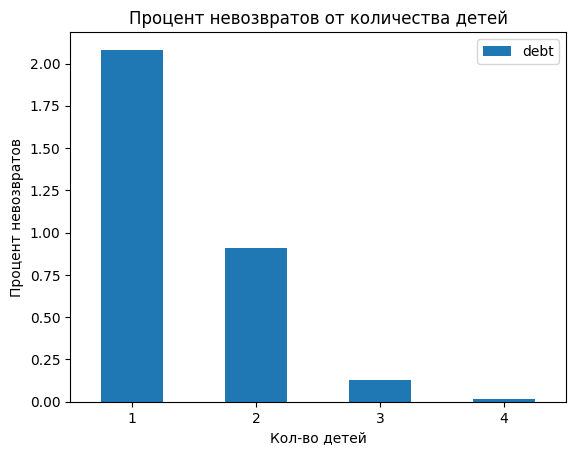

In [23]:
# Очевидную обработку по наличию и отсутсвию детей мы провели, но как влияет количество детей в семье на возврат кредита в срок?
family_count_children = data[(data['children'] != 0) & (data['debt'] != 0)].groupby('children')['debt'].count()
debt_count_children = (family_count_children / data_count) * 100

# Данные по количеству детей визуализируем через график для удобства восприятия
ax_count_children = debt_count_children.plot.bar(
    x=debt_count_children,
    y=debt_count_children.index,
    rot=0,
    title='Процент невозвратов от количества детей',
    legend=True,
    xlabel='Кол-во детей',
    ylabel='Процент невозвратов')

In [24]:
# Построим сводную таблицу
pivot_children = data.pivot_table(index=['children'], values='debt', aggfunc=['count', 'sum'])
pivot_children['Доля невозвратов'] = round(
    (pivot_children[('sum', 'debt')] / pivot_children[('count', 'debt')]) * 100, 2
)
pivot_children.columns = ['Кол-во клиентов', 'Кол-во невозвратов', 'Доля невозвратов']
pivot_children.index.name = 'Кол-во детей'
display(pivot_children)


,Кол-во клиентов,Кол-во невозвратов,Доля невозвратов
Кол-во детей,,,
0,14091,1063,7.54
1,4808,444,9.23
2,2052,194,9.45
3,330,27,8.18
4,41,4,9.76
5,9,0,0.00


**Вывод:**  
При пересчете оказалось, что доля невозвратов у клиентов без детей меньше, чем у клиентов с детьми. Так же наблюдается тенденция к росту доли невозвратов с ростом количества детей. 

3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

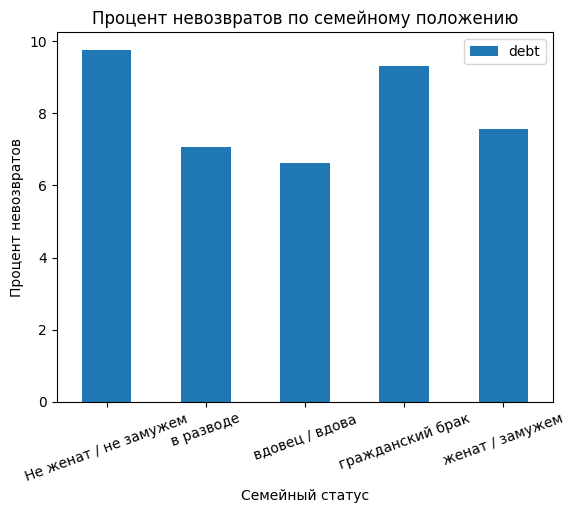

In [25]:
# Определим долю должников в зависимости от семейного положения
family_status_all =  data.groupby('family_status')['debt'].count()
family_status = data[data['debt'] != 0].groupby('family_status')['debt'].count()
debt_family_status = round((family_status / family_status_all)*100, 2)

# Данные визуализируем
ax_family_status = debt_family_status.plot.bar(
    x=debt_family_status,
    y=debt_family_status.index,
    rot=20,
    title='Процент невозвратов по семейному положению',
    legend=True,
    xlabel='Семейный статус',
    ylabel='Процент невозвратов')

**Вывод:** 
На графике хорошо видно, что процент невозвратов выше, если человек не в браке или живет в гражданском браке. Среди женатых или женатых ранее(разведенных, вдовцов) процент невозвратов ниже. Креди чаще в срок вернут те, кто женат/замежем, либо ранее был женат замужем.

In [26]:
# Построим сводную таблицу 
pivot_family = data.pivot_table(index=['family_status'], values='debt', aggfunc=['count', 'sum'])
pivot_family['Доля невозвратов'] = round(
    (pivot_family[('sum', 'debt')] / pivot_family[('count', 'debt')]) * 100, 2
)
pivot_family.columns = ['Кол-во клиентов', 'Кол-во невозвратов', 'Доля невозвратов']
pivot_family.index.name = 'Семейный статус'
display(pivot_family)

,Кол-во клиентов,Кол-во невозвратов,Доля невозвратов
Семейный статус,,,
Не женат / не замужем,2796,273,9.76
в разводе,1189,84,7.06
вдовец / вдова,951,63,6.62
гражданский брак,4134,385,9.31
женат / замужем,12261,927,7.56


3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

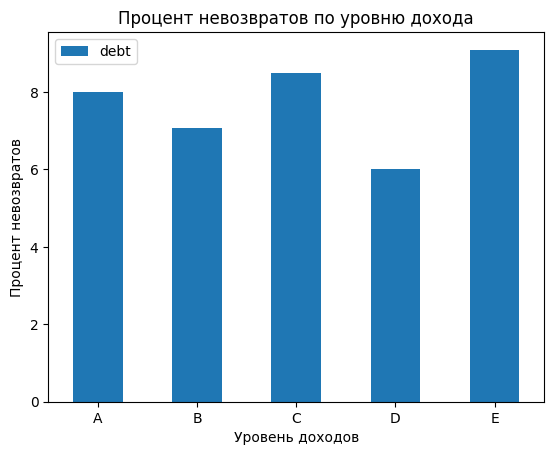

In [27]:
# Определим долю должников в зависимости от уровня дохода
income_all = data.groupby('total_income_category')['debt'].count()
income = data[data['debt'] != 0].groupby('total_income_category')['debt'].count()
debt_income_all = round((income / income_all) * 100 , 2)

# Данные визуализируем
ax_debt_income = debt_income_all.plot.bar(
    x=debt_income_all,
    y=debt_income_all.index,
    rot=0,
    title='Процент невозвратов по уровню дохода',
    legend=True,
    xlabel='Уровень доходов',
    ylabel='Процент невозвратов')

**Вывод:** 
На рафике видно, что уровень дохода значительно не влияет на возврат кредита в срок.

<div class="alert alert-info">

#### **Артём:** 💡 Дам тебе совет на будущее, как лучше проводить категоризацию количественных данных. **В этом проекте переделывать ничего не надо, так как заказчик уже предложил свои категории.** Если только как дополнительное исследование.
    
Сейчас самая маленькая категория в 728 раз меньше самой большой. Это может отразиться на результатах исследования. Когда мы делим на категории количественные данные, то лучше их делать примерно одинаковыми. Для этого можно воспользоваться методом `qcut()`. Пример:
    
```py
pd.qcut(df['total_income'], 4)
```
    
```
Name: total_income, Length: 21453, dtype: category
Categories (4, interval[float64]): [(20666.999, 107620.0]  (107620.0, 142594.0]  (142594.0, 195818.0]  (195818.0, 2265604.0]]
```
                                                                                                               
Что внутри: 
    
```py
pd.qcut(датафрейм['столбец'], количество_категорий)
``` 
    
Итого у нас 4 категории:
<ul>
  <li>меньше 107_620</li>
  <li>от 107_620 до 142_594</li>
  <li>от 142_594 до 195_818</li>
  <li>от 195_818</li>
</ul>

In [28]:
# Построим сводную таблицу 
pivot_income = data.pivot_table(index=['total_income_category'], values='debt', aggfunc=['count', 'sum'])
pivot_income['Доля невозвратов'] = round(
    (pivot_income[('sum', 'debt')] / pivot_income[('count', 'debt')]) * 100, 2
)
pivot_income.columns = ['Кол-во клиентов', 'Кол-во невозвратов', 'Доля невозвратов']
pivot_income.index.name = 'Уровень доходов'
display(pivot_income)

,Кол-во клиентов,Кол-во невозвратов,Доля невозвратов
Уровень доходов,,,
A,25,2,8.00
B,5014,354,7.06
C,15921,1353,8.50
D,349,21,6.02
E,22,2,9.09


3.4 Как разные цели кредита влияют на его возврат в срок?

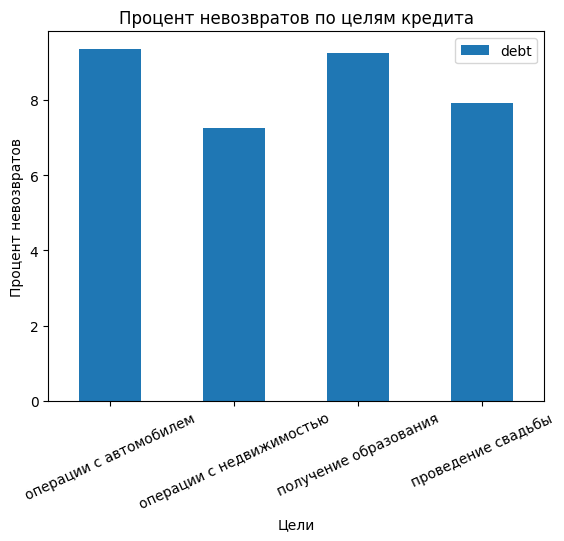

In [29]:
# Определим долю должников в зависимости от цели кредита
purpose_all = data.groupby('purpose_category')['debt'].count()
purpose = data[data['debt'] != 0].groupby('purpose_category')['debt'].count()
debt_purpose_all = round((purpose / purpose_all) * 100 , 2)

# Данные визуализируем
ax_purpose = debt_purpose_all.plot.bar(
    x=debt_purpose_all,
    y=debt_purpose_all.index,
    rot=25,
    title='Процент невозвратов по целям кредита',
    legend=True,
    xlabel='Цели',
    ylabel='Процент невозвратов')

**Вывод:** 
В этом случае цели можно сгруппировать по парам: процент невозвратов при операциях с недвижимостью и проведением свадьбы ниже, чем при операцияс с автомобилем и получением образования. Можно предположить, что недвижимость и свадьба являются более важным событием и люди подходят к нему с большей мерой ответственности, чем покупка авто и получение образования. 

In [30]:
# Построим сводную таблицу 
pivot_purpose = data.pivot_table(index=['purpose_category'], values='debt', aggfunc=['count', 'sum'])
pivot_purpose['Доля невозвратов'] = round(
    (pivot_purpose[('sum', 'debt')] / pivot_purpose[('count', 'debt')]) * 100, 2
)
pivot_purpose.columns = ['Кол-во клиентов', 'Кол-во невозвратов', 'Доля невозвратов']
pivot_purpose.index.name = 'Цели кредита'
display(pivot_purpose)

,Кол-во клиентов,Кол-во невозвратов,Доля невозвратов
Цели кредита,,,
операции с автомобилем,4279,400,9.35
операции с недвижимостью,10751,780,7.26
получение образования,3988,369,9.25
проведение свадьбы,2313,183,7.91


3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* возможно люди не захотели указывать свой трудовой стаж и месячный доход, чтобы получить одобрение кредитной заявки. В то же время эти поля на формах не являются обязательными и их можно пропустить при заполнении. Есть вероятность, что при отсуствии тех или иных данных человеку скорее одобрят кредит, чем не одобрят и, заметив такую тенденцию, операторы на местах в спорных случаях пропускают эти графы. Если расценивать пропуски как какую-то осознанную причину. Если же расценить на этапе обработки данных - кто-то не составил документацию к таблице и для некоторых клиентов были изменнеия в номере/названии столбца, что они не попали в выборку. Если таблицы склеивались из разных таблиц, то допустив, что это не мы склеивали - кто-то совершил ошибку и потерял часть данных. Так же есть вариант, что эти данные стали новыми и до определенного момента не требовались к заполнению, почему мы и получаем пустые значения для определенных клиентов. Что в целом так же можно проверить.

3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* таким образом мы берем медианное значение, которое не оказывает значительного влияния на выборку в целом. Если таких пропусков не много, то они в целом не исказят данные. Если же таких пропусков будет много, то и медианное значение, и среднее значение будут искажать данные в нашей выборке. 

Видимо, моя фраза "не оказывает значительного влияния на выборку в целом" слишком коротко звучит и не демонстрирует моё понимание.  
  
Медиана как бы сортирует все значения и выбирает среднее в этом списке(условно назовем списком), что очень удобно для количественных переменных. В отличие от среднего, которое складывает все количественные переменные и делит на их общее количество выдавая таким образом среднее. Поэтому мдеиана не оказывает значительного влияния на выборку в целом. То есть при данных [0, 10, 10, 15, 25, 40, 50] медианой будет 15, а средним 21,43. В то же время если бы было так [0, 10, 10, 15, 25, 200, None], то мы бы заменили неизвестное значение на медиану и оно бы не выбивалось из общего фона, в отличие от среднего.  
   
При этом я под "не оказывает значительного влияния на выборку в целом" я рассматривал вариант [None, None, None, 15, 14, 0, 16, None, None ]. Если мы в такой выборке заменим неизвестные значения на медианное, то оно окажет значительное влияние на выборку и это не лучший вариант, как и использовать среднее. Поскольку в заголовке не было дополнения типа "лучшее решение для количественных переменных в данном случае", то я решил учесть разные варианты и использовал несколько размытую формулировку.

### Шаг 4: общий вывод.

**Общий вывод:**  
  
* Доля невозвратов у клиентов без детей меньше, чем у клиентов с детьми. Так же наблюдается тенденция к росту доли невозвратов с ростом количества детей, что логически объясняется необходимостью больших трат на семейный бюджет;
* Существует зависимость между семейным положением и возвратом кредита в срок, по которой можно судить о том, что семейные люди(в том числе состоявшие в браке ранее) относятся к своевременному возврату кредита так же более ответственно, чем не семейные или живущие в гражданском браке;
* Четкой зависимости между среднемесячным уровнем дохода и возвратом кредита в срок не наблюдается;
* Разные цели кредита так же влияют на вероятность своевременного возврата кредита в срок. При покупке недвижимости или трат на свадьбу, процент возврата будет выше, поскольку к этому делу люди относятся более ответственно. В тоже время при кредиты на автомобили или образование не вызывают чувства ответсвенности и доля невозвратов в этих случаях выше.

<div class="alert alert-success">   
    
#### 📖 **Полезные ссылки**

* [Работа в Яндексе](https://yandex.ru/jobs/pages/analytics_interview?ysclid=l84s63fs1g790141490)
* [Настройте свой Jupyter Notebook правильно](https://medium.com/nuances-of-programming/настройте-свой-jupyter-notebook-правильно-faef14c89434)    
* [Краткое руководство по Маркдауну](https://paulradzkov.com/2014/markdown_cheatsheet/?)
* [PEP 8 – Style Guide for Python Code](https://www.python.org/dev/peps/pep-0008/)    
* [Обработка пропусков в данных](https://loginom.ru/blog/missing)  
* [Разделение данных с помощью qcut и cut в Pandas](https://dfedorov.spb.ru/pandas/Разделение%20данных%20в%20Pandas%20с%20помощью%20qcut%20и%20cut.html?)  
* [Официальная документаци метода qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
* [Подробное руководство по группировке и агрегированию с помощью pandas](https://dfedorov.spb.ru/pandas/Подробное%20руководство%20по%20группировке%20и%20агрегированию%20с%20помощью%20pandas.html?ysclid=lcmm6rtg2w602526506)
* [Шпаргалка по визуализации данных в Python с помощью Plotly](https://habr.com/ru/articles/502958/) 
* [Задачки SQL](https://habr.com/ru/company/dcmiran/blog/500360/)    
* [7 cайтов для оттачивания навыка написания SQL запросов на 2020 год](https://techrocks.ru/2019/11/22/7-sites-to-perfect-sql-query-writing-skills/)
* [Главред помогает очистить текст от словесного мусора, проверяет на соответствие информационному стилю.](https://glvrd.ru)

</div>